In [64]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [186]:
# Create a simple dataset
# X is the feature, and y is the target
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([1.2, 2.4, 3.0, 3.9, 5.1, 5.9, 7.0, 8.1, 9.2, 10.3])

In [187]:
# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [188]:
# Create a LinearRegression model
model = LinearRegression()

In [189]:
# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [190]:
# Make predictions using the test data
y_pred = model.predict(X_test)

In [191]:
# Print the model's parameters (slope and intercept)
print(f"Coefficient (slope): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")


Coefficient (slope): 1.012931034482759
Intercept: -0.008620689655174374


In [192]:
# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.07750631688466159


Text(0.5, 1.0, 'Linear Regression Example')

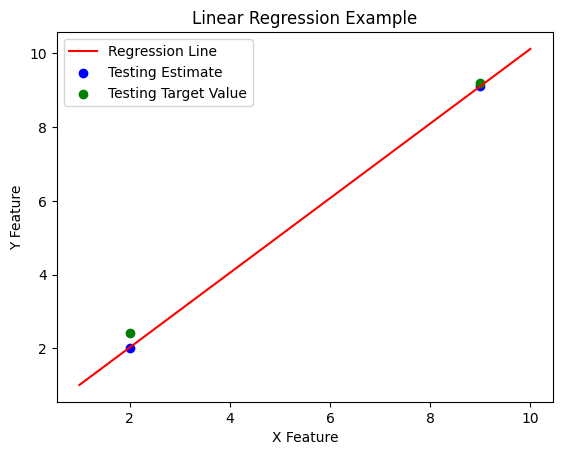

In [205]:
train_pred = model.predict(X_train)
srt_idx = np.argsort(train_pred)
plt.plot(X_train[srt_idx][:,0], train_pred[srt_idx], color='r', label='Regression Line')
plt.scatter(X_test, y_pred, color='b', label='Testing Estimate')
plt.scatter(X_test, y_test, color='g', label='Testing Target Value')
plt.legend()
plt.xlabel("X Feature")
plt.ylabel("Y Feature (")
plt.title("Linear Regression Example")

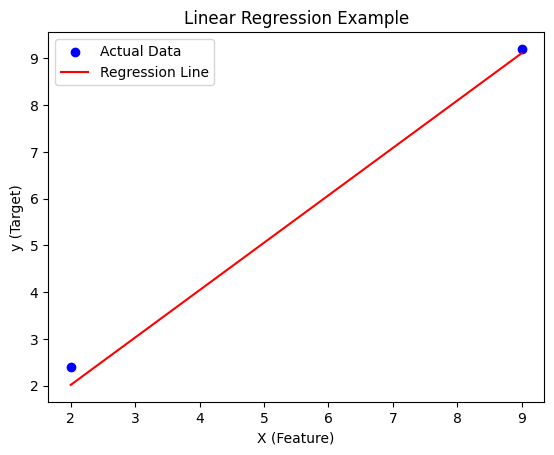

In [11]:
plt.plot(X_train, y_train, color='r')

In [185]:
from sklearn.datasets import fetch_openml, load_boston
# data = fetch_openml(data_id=506)
# print(data['feature_names'])
boston_data = load_boston()

['Married', 'Age', 'Years_of_education', 'Male', 'Religious', 'Sex_partners', 'Income', 'Drug_use', 'Same_sex_relations']


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets incl

In [127]:
print(boston_data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [128]:
print(boston_data['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [129]:
print(boston_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [161]:
X = boston_data['data'][:,[5,6]]#.reshape((-1,1))
y = boston_data['data'][:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

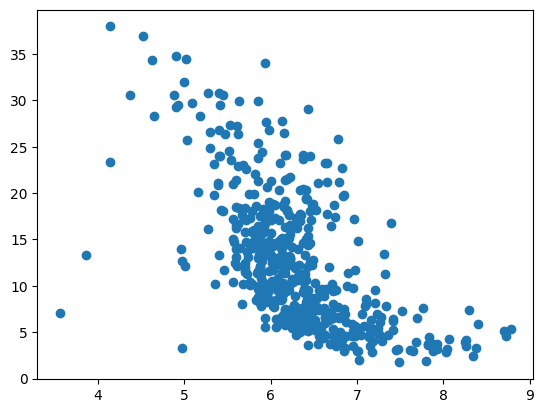

In [162]:
plt.scatter(X[:,0], y)

In [163]:
model = LinearRegression()
print(X_train.shape, y.shape)

model.fit(X_train, y_train)

(404, 2) (506,)


LinearRegression()

In [164]:
print(f"Model Slope: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

Model Slope: [-5.16216208  0.11745506]
Model Intercept: 37.00870482162614


In [165]:
results = model.predict(X_test)
mse = mean_squared_error(results,y_test)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 18.043260467387356


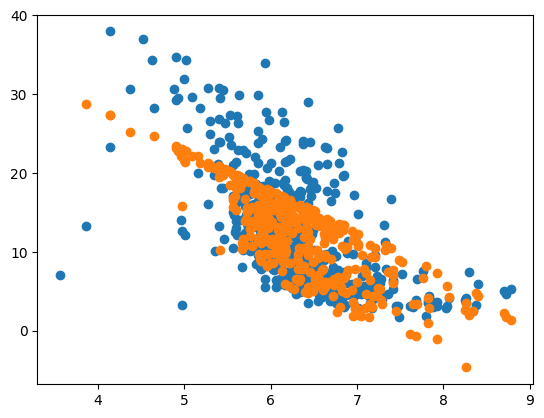

In [166]:
plt.scatter(X[:,0], y)
train_output = model.predict(X_train)
srt_idx = np.argsort(train_output)
# plt.plot(X_train[srt_idx][:,0], train_output[srt_idx])
plt.scatter(X_train[srt_idx][:,0], train_output[srt_idx])

In [179]:
poly = PolynomialFeatures(degree=6)  # You can change the degree to 3, 4, etc.
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [180]:
model.fit(X_train_poly, y_train)

LinearRegression()

In [181]:
results_poly = model.predict(X_train_poly)
mse = mean_squared_error(results_poly, y_train)
print(f"Polynomial of Higher Order MSE: {mse}")

Polynomial of Higher Order MSE: 17.774325731235933


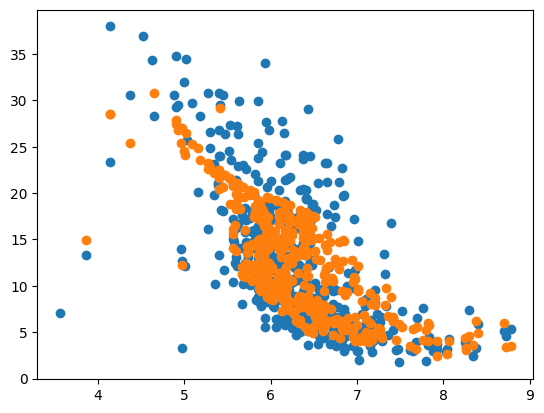

In [182]:
plt.scatter(X[:,0], y)
train_output = model.predict(X_train_poly)
srt_idx = np.argsort(train_output)
# plt.plot(X_train[srt_idx][:,0], train_output[srt_idx])
plt.scatter(X_train[srt_idx][:,0], train_output[srt_idx])